In [1]:
pwd

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [3]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv('ch1_discoveries.csv')

# Display the first five lines of the DataFrame
print(discoveries.head(5))

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


In [4]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


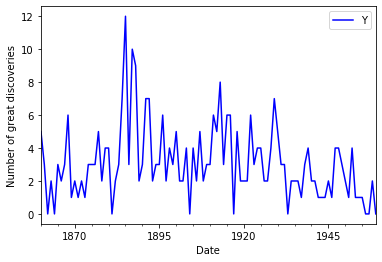

In [5]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

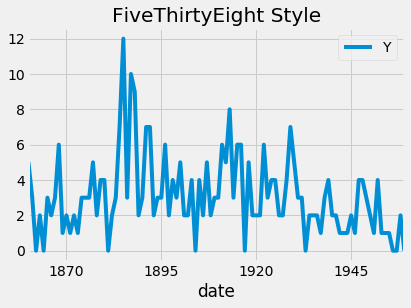

In [6]:

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

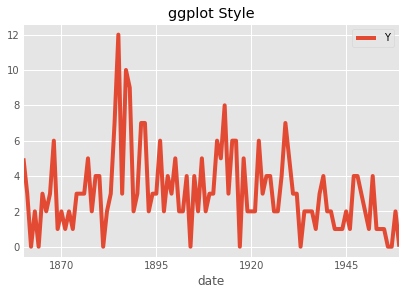

In [7]:
# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
plt.title('ggplot Style')
plt.show()

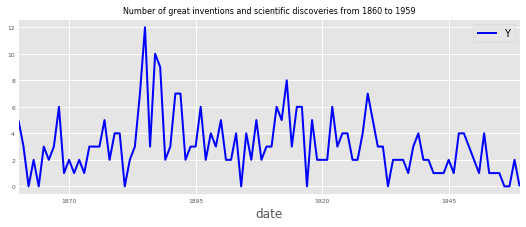

In [8]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

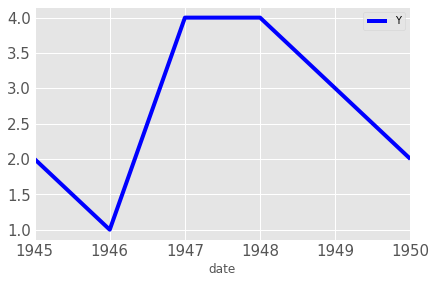

In [9]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

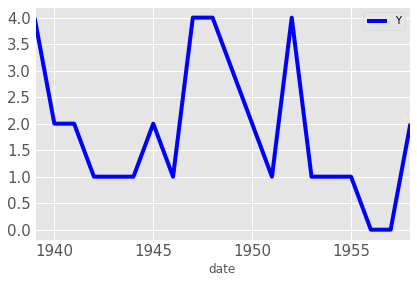

In [10]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939':'1958']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

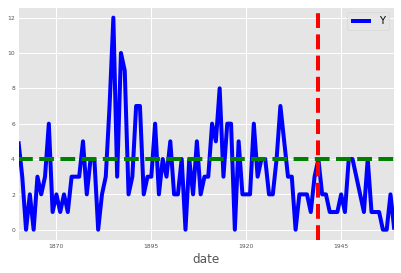

In [11]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

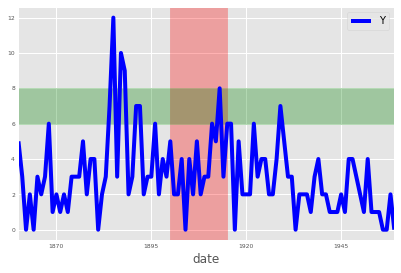

In [12]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

# excercise 2

In [13]:
co2_levels = pd.read_csv('ch2_co2_levels.csv')

In [14]:
co2_levels.head(7)

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
5,1958-05-03,316.9
6,1958-05-10,NaN


In [15]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')


# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


In [16]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')


# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


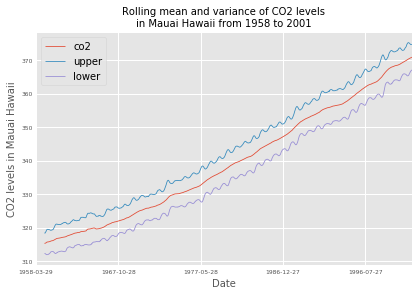

In [17]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()


# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] +  (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

In [18]:
co2_levels.reset_index('datestamp',inplace=True)

In [19]:
co2_levels['datestamp'] = pd.to_datetime(co2_levels.datestamp)

In [20]:
co2_levels.set_index('datestamp',inplace=True)

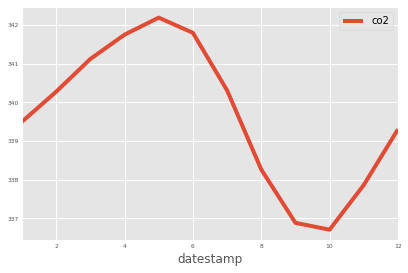

In [21]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month =  co2_levels.groupby(index_month).mean()


# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

In [22]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


No handles with labels found to put in legend.


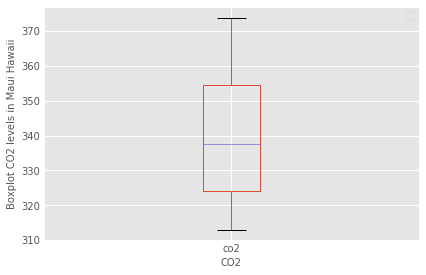

In [23]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

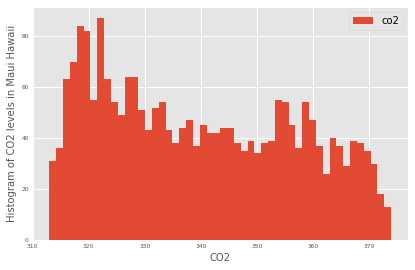

In [24]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

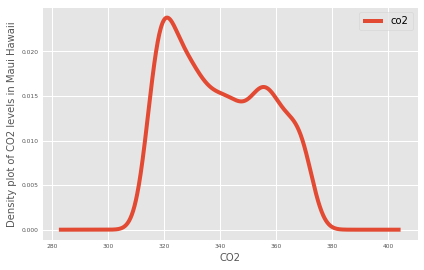

In [25]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

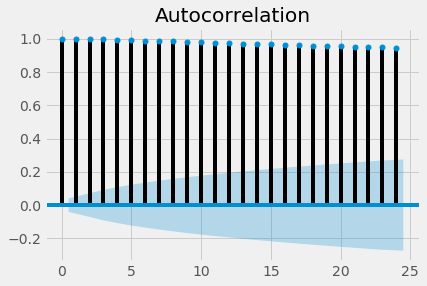

In [26]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

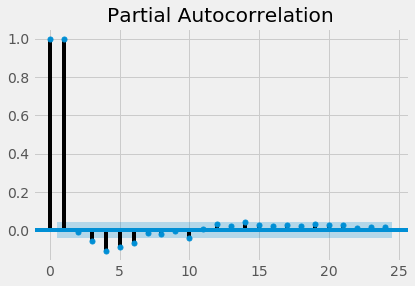

In [27]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

In [28]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)
# Print the seasonality component
print(decomposition.seasonal)

                 co2
datestamp           
1958-03-29  1.028042
1958-04-05  1.235242
1958-04-12  1.412344
1958-04-19  1.701186
1958-04-26  1.950694
1958-05-03  2.032939
1958-05-10  2.445506
1958-05-17  2.535041
1958-05-24  2.662031
1958-05-31  2.837948
1958-06-07  2.786137
1958-06-14  2.897139
1958-06-21  2.700962
1958-06-28  2.637389
1958-07-05  2.499487
1958-07-12  2.328869
1958-07-19  2.016146
1958-07-26  1.696378
1958-08-02  1.320640
1958-08-09  0.900761
1958-08-16  0.515989
1958-08-23  0.086897
1958-08-30 -0.474590
1958-09-06 -0.810900
1958-09-13 -1.287685
1958-09-20 -1.805108
1958-09-27 -2.068716
1958-10-04 -2.560531
1958-10-11 -2.856752
1958-10-18 -3.108765
...              ...
2001-06-09  1.320640
2001-06-16  0.900761
2001-06-23  0.515989
2001-06-30  0.086897
2001-07-07 -0.474590
2001-07-14 -0.810900
2001-07-21 -1.287685
2001-07-28 -1.805108
2001-08-04 -2.068716
2001-08-11 -2.560531
2001-08-18 -2.856752
2001-08-25 -3.108765
2001-09-01 -3.170460
2001-09-08 -3.267396
2001-09-15 -3

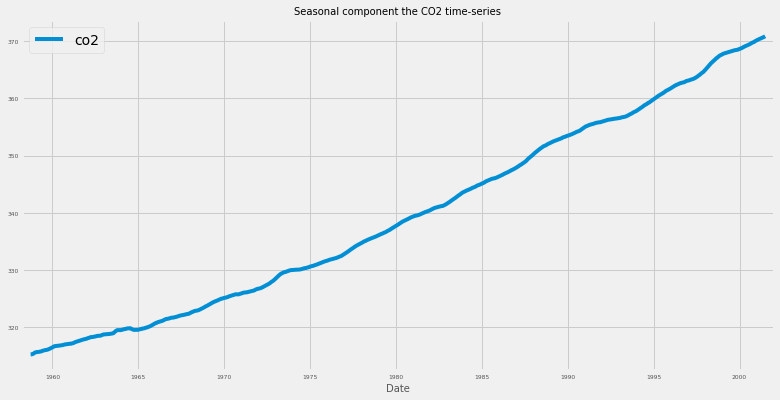

In [29]:
# Extract the trend component
trend = decomposition.trend


# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [30]:
airline = pd.read_csv('ch3_airline_passengers.csv')
airline.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


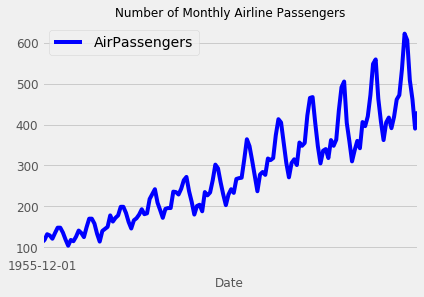

In [31]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

In [32]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

Month            0
AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


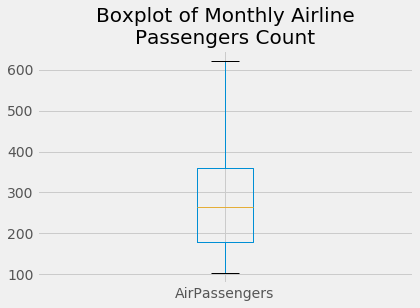

In [33]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

In [34]:
airline['Month'] = pd.to_datetime(airline.Month)

In [35]:
airline.set_index('Month', inplace=True)

In [36]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

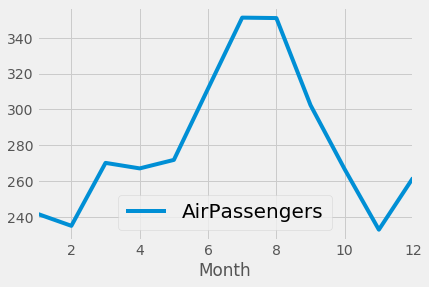

In [37]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

In [38]:
# Import statsmodels.api as sm
import statsmodels.api as sm


# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)
# Extract the trend and seasonal components
trend =  decomposition.trend
seasonal = decomposition.seasonal

In [39]:
import numpy as np

In [54]:

# Read in meat DataFrame
meat = pd.read_csv('ch4_meat.csv')

# Review the first five lines of the meat DataFrame
display(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
meat.describe()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


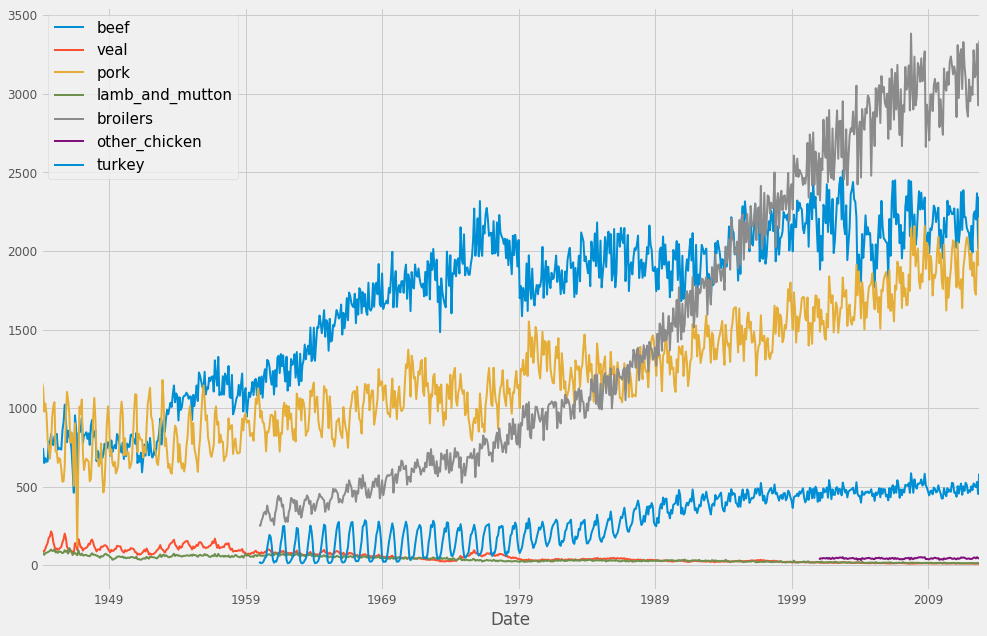

In [55]:
# Plot time series dataset
ax = meat.plot(fontsize=12, linewidth=2, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

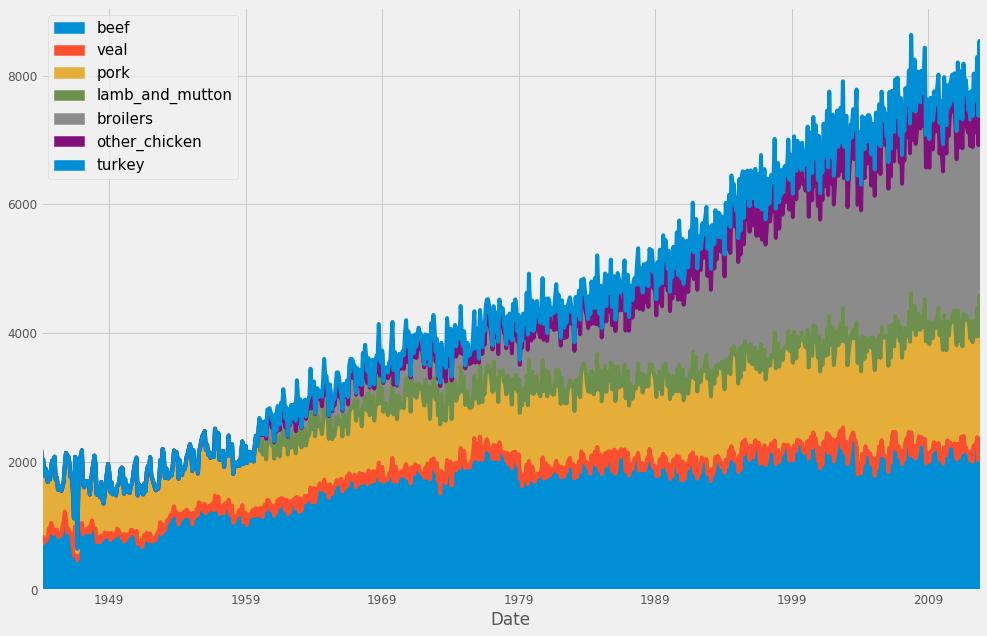

In [56]:
# Plot an area chart
ax = meat.plot.area(fontsize=12, figsize=(15,10))
# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

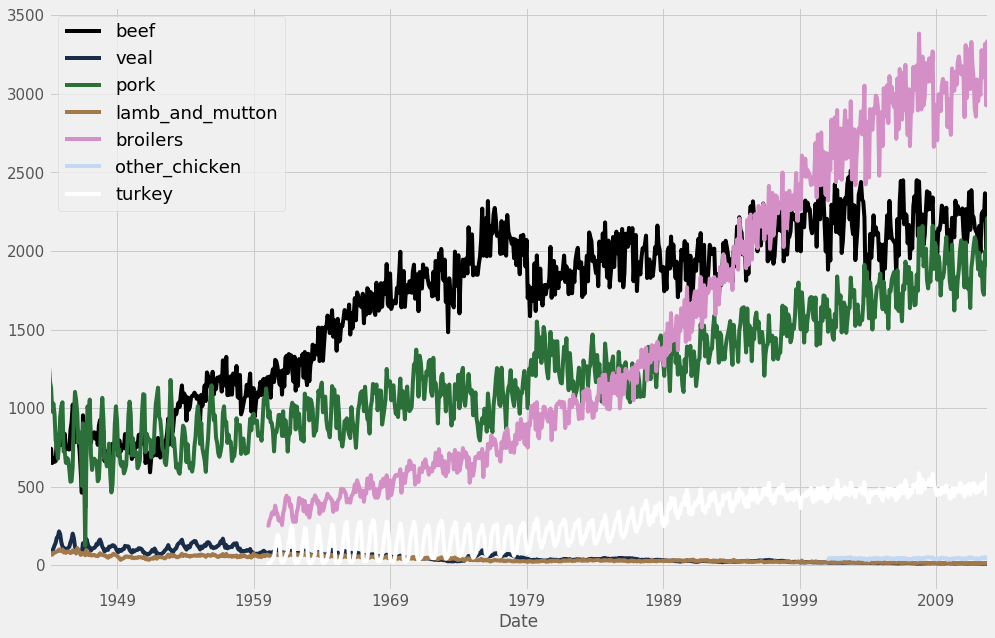

In [57]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15,figsize=(15,10))


# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

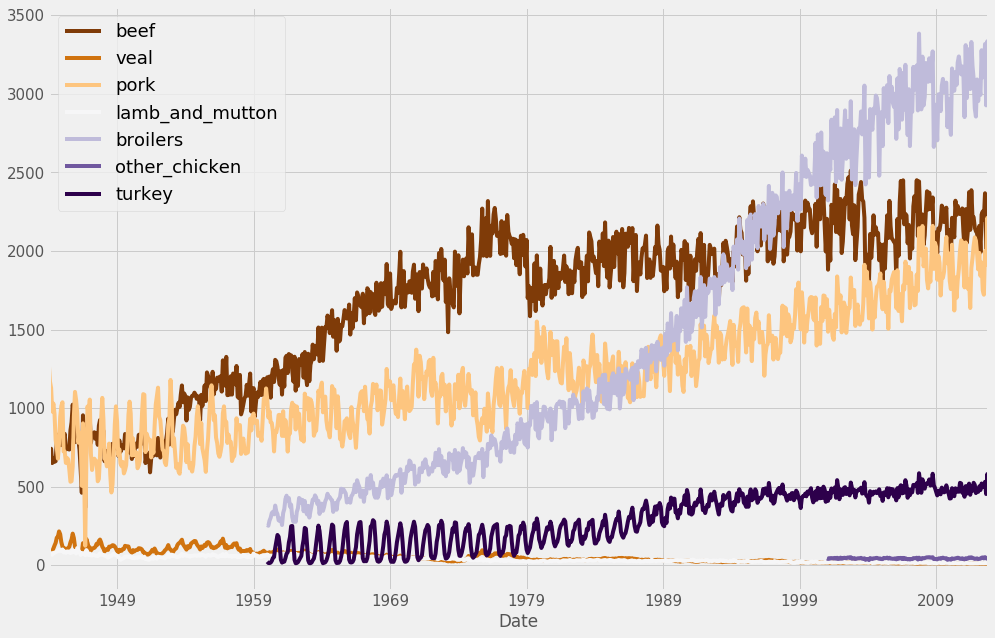

In [58]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

In [59]:
des = meat.describe().loc['mean']
meat_mean = pd.DataFrame([des.values], columns=des.index.values, index=['mean'])
meat_mean

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
mean,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


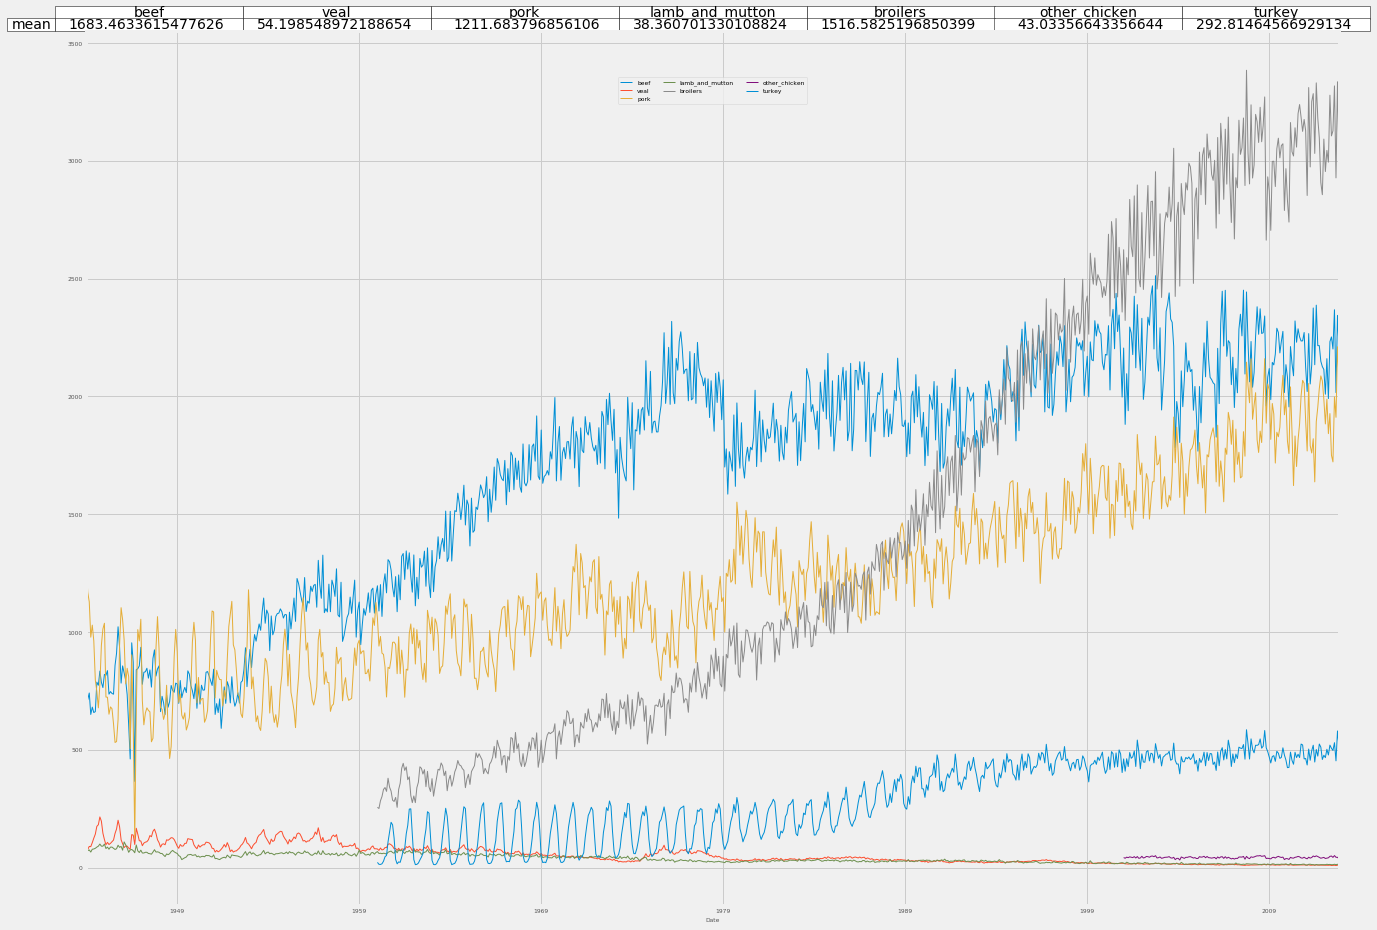

In [60]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1,figsize=(20,15))

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index.values,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

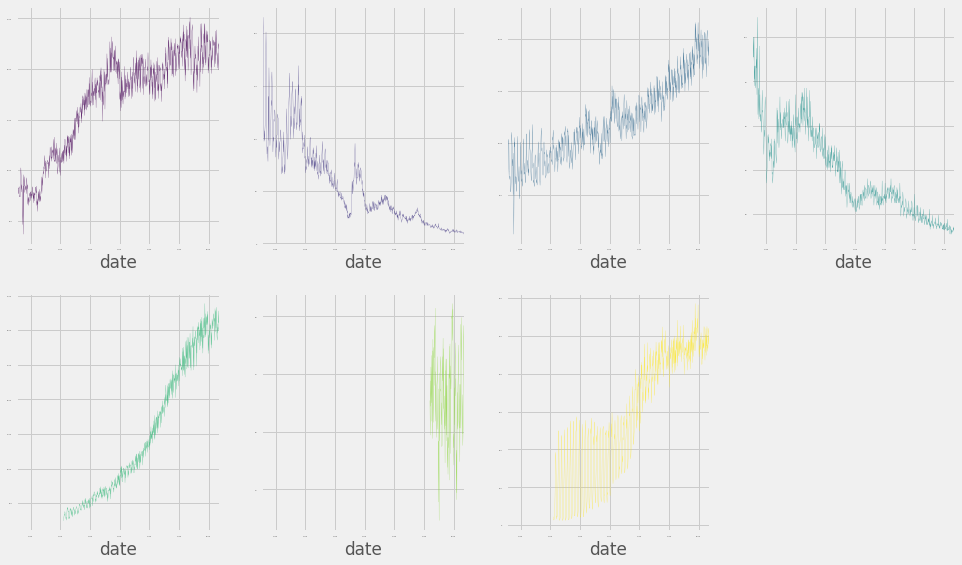

In [61]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True,
          figsize=(15,9),
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show()

In [62]:
# Compute the correlation between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


In [63]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr('pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


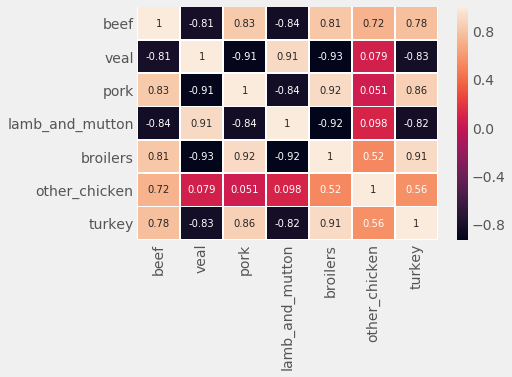

In [64]:
# Import seaborn library
import seaborn as sns


# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')



# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

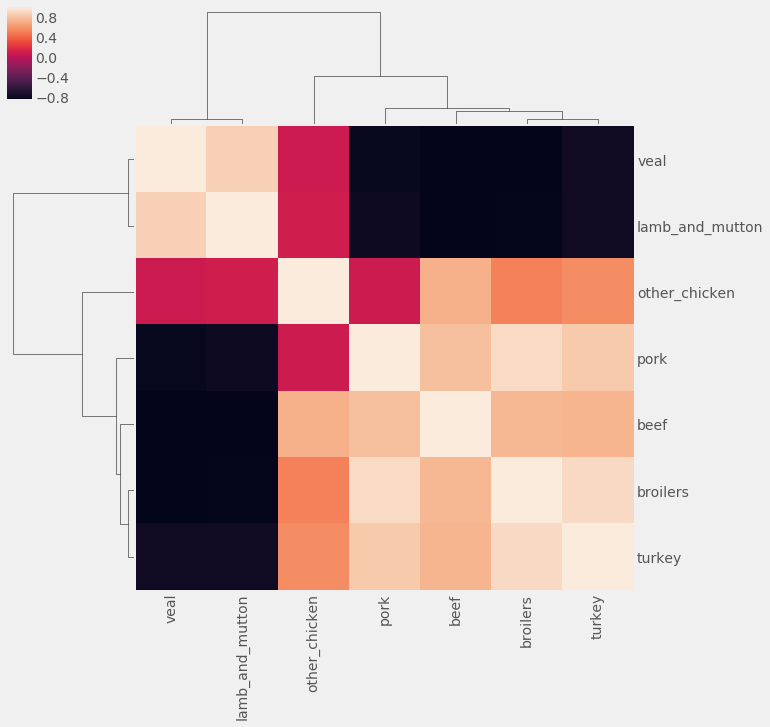

In [65]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()